In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('car driving risk analysis.csv')
df.head(15)

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


## Basic Data Checking 
df.shape
df.head()
df.info()
df.describe()

In [3]:
df.shape

(15, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   15 non-null     int64
 1   risk    15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [5]:
df.describe()

,speed,risk
count,15.000000,15.000000
mean,179.666667,55.800000
std,92.687391,35.827364
min,30.000000,2.000000
25%,102.500000,19.000000
50%,190.000000,60.000000
75%,250.000000,88.000000
max,310.000000,98.000000


## Handling Missing Values and Duplicates
df.isnull().sum()
df.duplicated().sum()

In [6]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Understanding Data Distribution
df['column'].value_counts()
df['column'].hist()

In [8]:
df['risk'].value_counts()

risk
95    1
20    1
98    1
60    1
72    1
10    1
7     1
85    1
45    1
91    1
82    1
59    1
93    1
18    1
2     1
Name: count, dtype: int64

<Axes: >

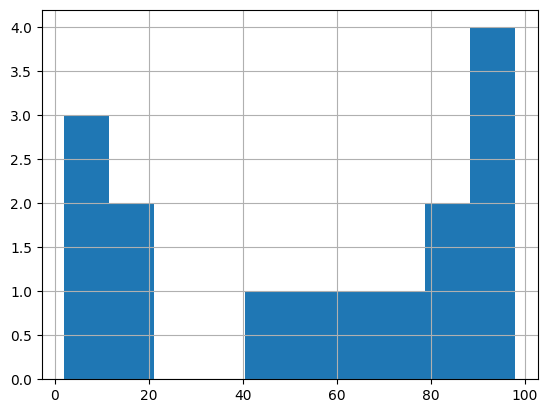

In [9]:
df['risk'].hist()

## Finding Correlation Between Variables
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

<Axes: >

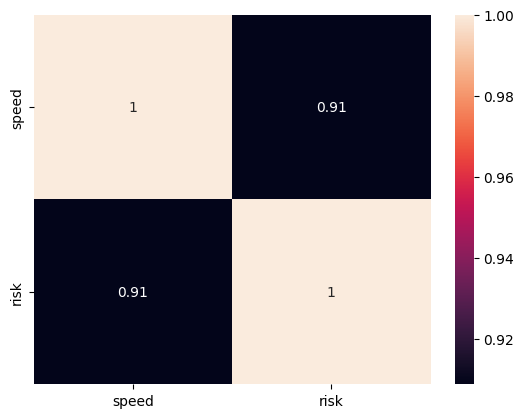

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [24]:
x = df[['speed']]
x.head()

,speed
0,200
1,90
2,300
3,110
4,240


In [12]:
y = df['risk']
y.head()

0    95
1    20
2    98
3    60
4    72
Name: risk, dtype: int64

## Data Visualization 

Text(0.5, 1.0, 'Car driving risk analysis')

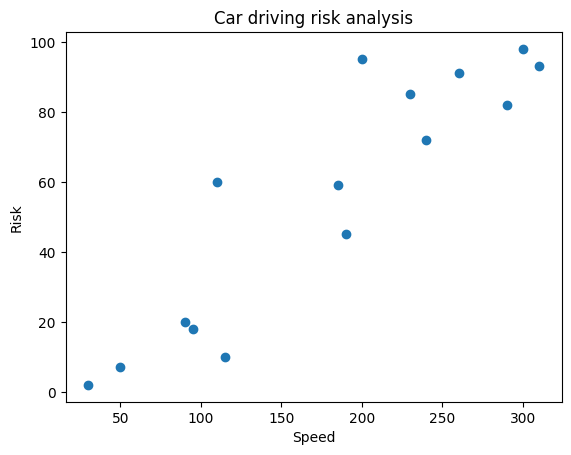

In [13]:
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

# Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()

In [15]:
x.mean()

speed    179.666667
dtype: float64

In [16]:
y.mean()

np.float64(55.8)

Text(0.5, 1.0, 'Car driving risk analysis')

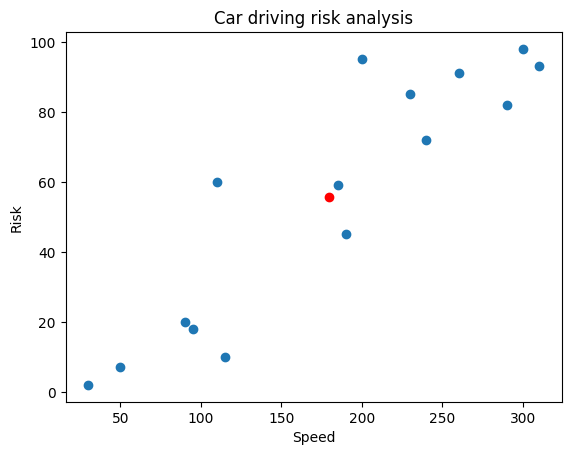

In [17]:
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

# Train the ML Model

In [18]:
lrg.fit(x,y)

LinearRegression()

In [19]:
m = lrg.coef_
m

array([0.35131645])

In [20]:
c = lrg.intercept_
c

np.float64(-7.319854775234184)

## Mathematical formula: y = mx + c

In [23]:
m*250 + c

array([80.50925669])

In [27]:
lrg.predict([[250]])

C:\Users\HB\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([80.50925669])

In [29]:
df['predicted_y'] = lrg.predict(x)
df.head()

,speed,risk,predicted_y
0,200,95,62.943434
1,90,20,24.298625
2,300,98,98.075079
3,110,60,31.324954
4,240,72,76.996092


Text(0.5, 1.0, 'Car driving risk analysis')

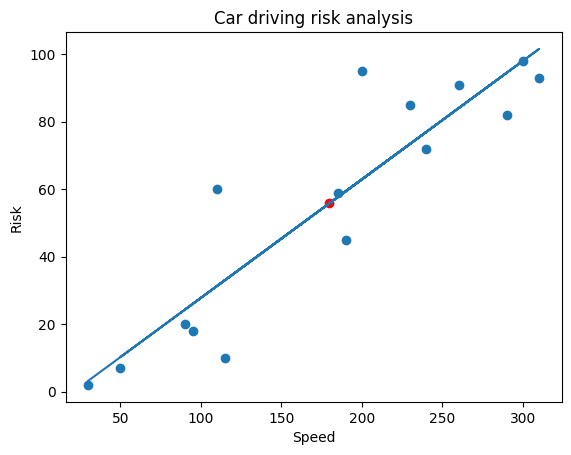

In [34]:
plt.plot(x,df['predicted_y'])
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['speed'], df['risk'])
plt.xlabel('Speed')
plt.ylabel('Risk')
plt.title('Car driving risk analysis')

# Lose & Cost Function

In [36]:
df['lose'] = df['risk'] - df['predicted_y']
df.head()

,speed,risk,predicted_y,lose
0,200,95,62.943434,32.056566
1,90,20,24.298625,-4.298625
2,300,98,98.075079,-0.075079
3,110,60,31.324954,28.675046
4,240,72,76.996092,-4.996092


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
mse = mean_squared_error(df['risk'], df['predicted_y'])
mse

208.3916597380042

In [40]:
mae = mean_absolute_error(df['risk'], df['predicted_y'])
mae

10.740343292130891

In [43]:
sum(abs(df['lose'])) / len(x)

10.740343292130891

In [44]:
lrg.score(x,y)

0.8260542394120296

Text(0.5, 1.0, 'Car driving risk analysis ')

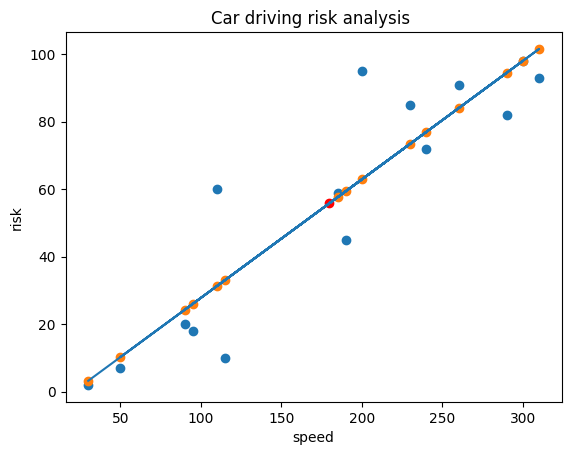

In [53]:
plt.plot(x,lrg.predict(x))
plt.scatter(x.mean(), y.mean(), color='red')
plt.scatter(df['speed'], df['risk'])
plt.scatter(df['speed'], lrg.predict(x))
plt.xlabel('speed')
plt.ylabel('risk')
plt.title('Car driving risk analysis ')